## 🤖 Step 5.3.2: SVM Regression for Power Consumption Forecasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

## 📥 Load scaled data

In [2]:
X_scaled = np.load('../Datasets/X_scaled.npy')
y_scaled = np.load('../Datasets/y_scaled.npy')

# Flatten target for SVR
y_scaled = y_scaled.ravel()

## ✂️ Split into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

## 🎯 Train Support Vector Regressor

In [4]:
svr = SVR(kernel='rbf', C=100, epsilon=0.01)
svr.fit(X_train, y_train)

SVR(C=100, epsilon=0.01)

## 🔮 Predict and inverse scale

In [5]:
y_pred_scaled = svr.predict(X_test)

# Load target scaler to inverse transform
with open('../Scaler/y_scaler.pkl', 'rb') as f:
    y_scaler = pickle.load(f)

y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1))

## 📉 Evaluate RMSE

In [6]:
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"SVM RMSE: {rmse:.2f}")

SVM RMSE: 704.78


## 📊 Plot actual vs predicted

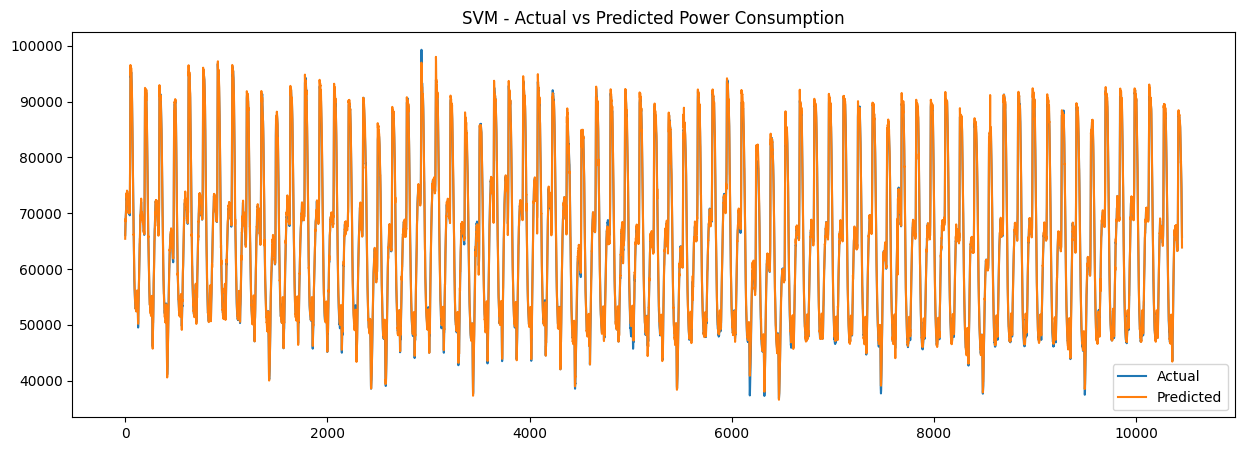

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('SVM - Actual vs Predicted Power Consumption')
plt.legend()
plt.show()